Question 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# TO GENERATE THE RANDOM DATA USING NUMPY 
data = np.random.randint(10,60,150).reshape(30,5)
data

array([[23, 10, 35, 48, 11],
       [59, 17, 26, 46, 18],
       [35, 16, 25, 41, 38],
       [25, 44, 57, 26, 53],
       [50, 49, 26, 31, 13],
       [13, 15, 30, 34, 48],
       [59, 51, 46, 12, 23],
       [56, 55, 57, 14, 21],
       [47, 14, 35, 50, 23],
       [48, 49, 12, 25, 33],
       [25, 34, 52, 20, 25],
       [31, 46, 21, 13, 10],
       [54, 12, 29, 24, 46],
       [13, 40, 24, 19, 54],
       [48, 19, 57, 19, 13],
       [47, 59, 18, 24, 34],
       [33, 33, 32, 41, 29],
       [39, 58, 24, 56, 47],
       [53, 32, 53, 46, 59],
       [12, 17, 36, 40, 32],
       [20, 48, 31, 24, 40],
       [28, 17, 51, 39, 26],
       [12, 17, 39, 40, 48],
       [21, 41, 11, 52, 21],
       [47, 15, 10, 51, 44],
       [10, 57, 55, 56, 34],
       [14, 44, 24, 27, 52],
       [44, 30, 25, 38, 43],
       [31, 25, 27, 39, 45],
       [57, 15, 51, 12, 55]])

In [6]:
# Generating Mean of the Data 
Data_mean = data - np.mean(data, axis=0)

In [8]:
# Generating Covariance of the Data 
Data_cov = np.cov(Data_mean,rowvar=False)
Data_cov

array([[268.8091954 ,  -1.25977011,   8.48735632, -50.25057471,
        -44.11724138],
       [ -1.25977011, 269.96436782, -11.28850575, -53.12988506,
        -11.66896552],
       [  8.48735632, -11.28850575, 212.86091954, -47.01494253,
         -1.70344828],
       [-50.25057471, -53.12988506, -47.01494253, 189.97816092,
          8.7862069 ],
       [-44.11724138, -11.66896552,  -1.70344828,   8.7862069 ,
        213.69655172]])

In [11]:
#Finding the eigen value and eigen vector
data_eigval,data_eigvec = np.linalg.eigh(Data_cov)
data_eigval

array([124.45604855, 190.14961413, 232.59503793, 277.53877337,
       330.56972142])

In [12]:
data_eigvec

array([[ 0.28449369, -0.43354943, -0.22549976,  0.50831333, -0.64951185],
       [ 0.33035753, -0.01120292, -0.15217228, -0.82191263, -0.43822553],
       [ 0.4323558 ,  0.31952548,  0.80802024,  0.12851762, -0.20385886],
       [ 0.7808465 ,  0.1090442 , -0.35715291,  0.11912225,  0.48645637],
       [ 0.11521478, -0.83541739,  0.38149513, -0.18806993,  0.32847299]])

In [14]:
# Sorting the eigen value and eigen vector in descending order 
sort_index = np.argsort(data_eigval)[::-1]
eigval_sort = data_eigval[sort_index]
eigvec_sort = data_eigvec[sort_index]

In [15]:
# select the first desired dimension eigenvectors
num_components = 2
eigenvector_subset = eigvec_sort[:,0:num_components]

In [16]:
# Transforming the data into the reduced form 
reduced_data = np.dot(eigenvector_subset.transpose(),Data_mean.transpose()).transpose()
reduced_data

array([[-20.57022144,  18.06861137],
       [-13.51702549, -17.13127478],
       [-13.45729618,  -6.12480109],
       [ 20.40168613,   9.17222803],
       [  4.05529794,  -3.78731292],
       [-14.07865451,   9.48589084],
       [ 11.86918381,  -8.8201103 ],
       [ 19.494567  ,  -1.51820805],
       [-10.60704144,  -6.77022823],
       [  1.47961581, -15.19360592],
       [  0.48347349,  18.69076025],
       [ -9.438018  ,  11.6631584 ],
       [-16.00230674, -24.43375219],
       [ -0.40002776,   7.86159018],
       [-10.16178697,   4.65192075],
       [ 11.72113699, -11.77294018],
       [  0.05271209,   3.5384083 ],
       [ 26.88256623,  -9.27612846],
       [ 20.8422315 , -19.63144623],
       [-12.60779537,  19.32612287],
       [  7.34861422,  11.13637781],
       [ -6.31634159,  13.36482628],
       [ -6.75882885,  13.3479084 ],
       [ -2.80458182,  11.07089887],
       [-14.33036494, -23.76506194],
       [ 32.46510316,  30.38336409],
       [  4.91244588,   8.23982508],
 

In [17]:
# Final Result of getting a lower dimension dataset
reduced_data.shape

(30, 2)

Question 2

In [3]:
# Extracting the IRIS Dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
# Setting the target
data.head(7)
target = data.iloc[:,4]

In [5]:
data.shape

(150, 5)

In [6]:
# prepare the data
x = data.iloc[:,0:4]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Normalizing the data to same type 
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
# Generating Mean,Covariance,Eigen Value and Vector of the Data 
X_meaned = scaled_data - np.mean(scaled_data , axis = 0) 
cov_mat = np.cov(X_meaned , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [9]:
# Sorting the eigen value and eigen vector in descending order 
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [11]:
# select the first desired dimension eigenvectors
num_components=2
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

In [12]:
#Creating a Pandas DataFrame of reduced Dataset
#Concat it with target variable to create a complete Dataset
principal_df = pd.DataFrame(X_reduced, columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

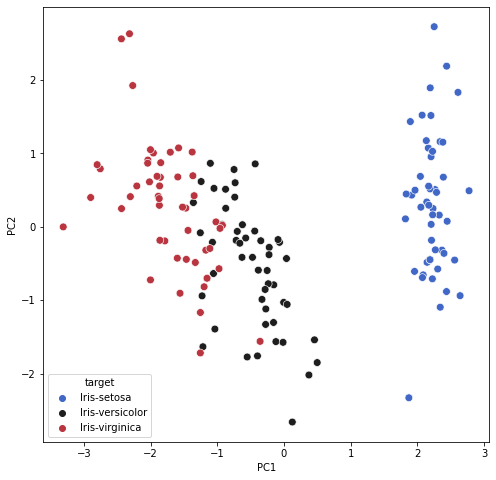

In [15]:
# Plot the Dataset 
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [14]:
print("Current shape of input data matrix: ", principal_df.shape)

Current shape of input data matrix:  (150, 3)


Question 3

(690, 1023, 3)


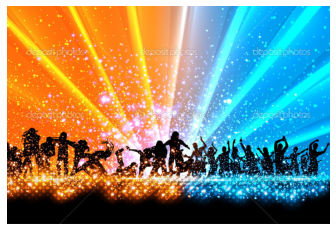

In [27]:
from sklearn.decomposition import PCA
import matplotlib.image as mpimg 
img = mpimg.imread('../Dataset/Images/dbg.jpg') 
# Printing the size of numpy array object img as well as plot it using imshow. 
print (img.shape)
print (img.shape)
plt.axis('off') 
plt.imshow(img) 

In [28]:
# Reshape it into a format that PCA can understand.  3069 = 1023 * 3
img_r = np.reshape(img, (690, 3069)) 
print (img_r.shape)

(690, 3069)


In [29]:
# RandomizedPCA with 64 components (8x8 pixels) and transform the image. 
i_PCA = PCA(64).fit(img_r) 
img_com = i_PCA.transform(img_r) 
print (img_com.shape) 
print (np.sum(i_PCA.explained_variance_ratio_))

(690, 64)
0.9456988925043814


In [35]:
final_img = i_PCA.inverse_transform(img_com) 
print (final_img.shape) 
final_img = np.reshape(final_img, (690,1023,3)) 
print (final_img.shape )

(690, 3069)
(690, 1023, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


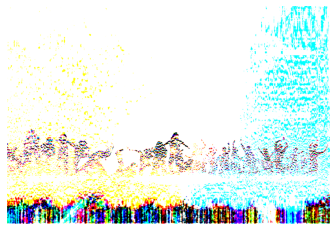

In [31]:
# Print the Reduced Dimension Image 
plt.axis('off')
plt.imshow(final_img)

Question 4

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

In [3]:
# Extract the dataset 
f_data = fetch_olivetti_faces()

In [4]:
n_samples, height, width = f_data.images.shape
x = f_data.data
n_features = x.shape[1]
y = f_data.target
n_classes = int(max(y)+1)

print("Number of samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {},\nNumber of output classes: {}\n".format(n_samples,height,
width,n_features,n_classes))

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



In [5]:
# Split into a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

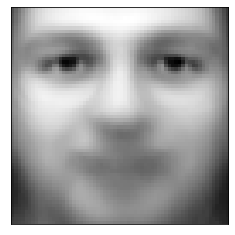

In [6]:
mean_img = np.mean(X_train,axis=0)
plt.figure
plt.imshow(mean_img.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

MAKE A FUNCTION FOR VISUALIZATION OF IMAGES AS AN ALBUM

In [7]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

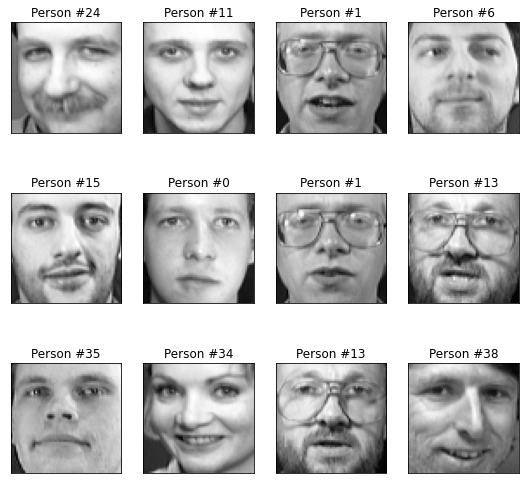

In [8]:
# Visualize some faces from the training set
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]
plot_gallery(chosen_images, height, width, titles)

In [9]:
#Reduce the dimensionality of the feature space
n_components = 150
#Finding the top n_components principal components in the data and aslo find eigen-vectors
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, height, width))

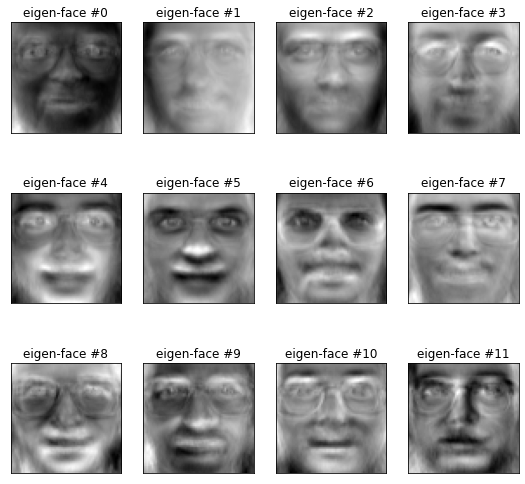

In [10]:
titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [11]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)
